### importing imp. libraries

In [30]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

In [31]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### loading the data

In [32]:
#losd data and review content
iris_data = pd.read_csv("iris.csv")

print("\nLoaded Data :\n-----------------------------------")
print(iris_data.head())


Loaded Data :
-----------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [33]:
#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])

In [34]:
#convert input to numpy array
np_iris = iris_data.to_numpy()

In [35]:
# separate feature and tgt variables
X = np_iris[:,0:4]
Y = np_iris[:,4]

### scaling - StandardScalar

In [36]:
print("\nFeatures before scaling :\n-------------------------")
print(X[:5,:])
print("\ntarget before scaling :\n-------------------------")
print(Y[:5])


Features before scaling :
-------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

target before scaling :
-------------------------
[0. 0. 0. 0. 0.]


In [37]:
# lets start scaling for independent variables

# scalar model
ss = StandardScaler().fit(X)
# transforming
X = ss.transform(X)

In [38]:
# convert tgt variables as one-hot encoding array
Y = tf.keras.utils.to_categorical(Y,3)

In [39]:
print("\nFeatures after scaling :\n------------------------------------")
print(X[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y[:5,:])


Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### train-test split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.10) 

print("Train Test shape\n-------------------")
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train Test shape
-------------------
(135, 4) (15, 4) (135, 3) (15, 3)


In [41]:
# #Load Data and review content
# iris_data = pd.read_csv("iris.csv")

# print("\nLoaded Data :\n------------------------------------")
# print(iris_data.head())

# #Use a Label encoder to convert String to numeric values 
# #for the target variable

# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# iris_data['Species'] = label_encoder.fit_transform(
#                                 iris_data['Species'])

# #Convert input to numpy array
# np_iris = iris_data.to_numpy()

# #Separate feature and target variables
# X_data = np_iris[:,0:4]
# Y_data=np_iris[:,4]

# print("\nFeatures before scaling :\n------------------------------------")
# print(X_data[:5,:])
# print("\nTarget before scaling :\n------------------------------------")
# print(Y_data[:5])

# #Create a scaler model that is fit on the input data.
# scaler = StandardScaler().fit(X_data)

# #Scale the numeric feature variables
# X_data = scaler.transform(X_data)

# #Convert target variable as a one-hot-encoding array
# Y_data = tf.keras.utils.to_categorical(Y_data,3)

# print("\nFeatures after scaling :\n------------------------------------")
# print(X_data[:5,:])
# print("\nTarget after one-hot-encoding :\n------------------------------------")
# print(Y_data[:5,:])

# #Split training and test data
# X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

# print("\nTrain Test Dimensions:\n------------------------------------")
# print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

### building HL and networks

In [42]:
from tensorflow import keras

In [43]:
# no of classes in tgt variables
NB_CLASSES = 3

In [44]:
# create a sequential model in keras
model = tf.keras.models.Sequential()

# add a first HL 
model.add(keras.layers.Dense(128,                               # no. of nodes
                            input_shape = (4,),                 # no. of independents(I/P) variables
                            name = 'Hidden-Layer-1',            # logical name
                            activation='relu')                  # activation function
         )

# add a second HL
model.add(keras.layers.Dense(128,
                            name = 'Hidden-Layer-2',
                            activation = 'relu'))

# add an output layer with Softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

# compile the model with loss and metrics
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])

# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [45]:
# from tensorflow import keras

# #Number of classes in the target variable
# NB_CLASSES=3

# #Create a sequencial model in Keras
# model = tf.keras.models.Sequential()

# #Add the first hidden layer
# model.add(keras.layers.Dense(128,                    #Number of nodes
#                              input_shape=(4,),       #Number of input variables
#                               name='Hidden-Layer-1', #Logical name
#                               activation='relu'))    #activation function

# #Add a second hidden layer
# model.add(keras.layers.Dense(128,
#                               name='Hidden-Layer-2',
#                               activation='relu'))

# #Add an output layer with softmax activation
# model.add(keras.layers.Dense(NB_CLASSES,
#                              name='Output-Layer',
#                              activation='softmax'))

# #Compile the model with loss & metrics
# model.compile(loss='categorical_crossentropy',
#               metrics=['accuracy'])

# #Print the model meta-data
# model.summary()

### Training and evaluating the Model
#### Training the model involves defining various training models and then perform forward and back propagation.

Training Progress:
---------------------------------
Epoch 1/10
8/8 [==============================] - 0s 18ms/step - loss: 0.8259 - accuracy: 0.7083 - val_loss: 0.6256 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.5295 - accuracy: 0.8500 - val_loss: 0.6425 - val_accuracy: 0.7667
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4145 - accuracy: 0.8833 - val_loss: 0.7305 - val_accuracy: 0.6000
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.9083 - val_loss: 0.5643 - val_accuracy: 0.7667
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3060 - accuracy: 0.9167 - val_loss: 0.4260 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.9417 - val_loss: 0.3683 - val_accuracy: 0.9333
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.2476 - accuracy: 0.9500 - val_loss: 0.4605 - v

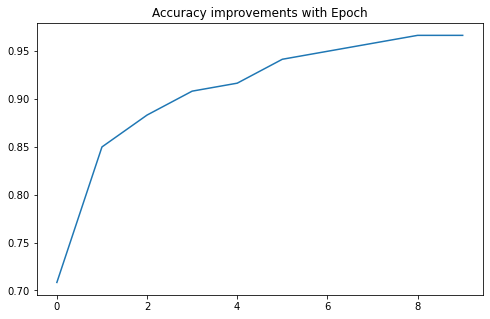


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 19ms/step - loss: 0.1715 - accuracy: 0.9333


[0.17146113514900208, 0.9333333373069763]

In [46]:
# make the verbose so that we can see the progress
VERBOSE = 1

#Setup Hyper Parameters for training

# set batch size
BATCH_SIZE = 16

# set no. of epochs
EPOCHS = 10

# set validation split = 20% of the traing data 
# after each epoch
VALIDATION_SPLIT=0.2

print("Training Progress:\n---------------------------------")

# Fit the model. This will perform the entire training cycle, including forward propagation, loss computation,
# backward propagation and gradient descent.
# execute validation after each epoch

history = model.fit(X, Y, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Traing\n----------------------------------")

import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [47]:
# #Make it verbose so we can see the progress
# VERBOSE=1

# #Setup Hyper Parameters for training

# #Set Batch size
# BATCH_SIZE=16
# #Set number of epochs
# EPOCHS=10
# #Set validation split. 20% of the training data will be used for validation
# #after each epoch
# VALIDATION_SPLIT=0.2

# print("\nTraining Progress:\n------------------------------------")

# #Fit the model. This will perform the entire training cycle, including
# #forward propagation, loss computation, backward propagation and gradient descent.
# #Execute for the specified batch sizes and epoch
# #Perform validation after each epoch 
# history=model.fit(X_train,
#           Y_train,
#           batch_size=BATCH_SIZE,
#           epochs=EPOCHS,
#           verbose=VERBOSE,
#           validation_split=VALIDATION_SPLIT)

# print("\nAccuracy during Training :\n------------------------------------")
# import matplotlib.pyplot as plt

# #Plot accuracy of the model after each epoch.
# pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
# plt.title("Accuracy improvements with Epoch")
# plt.show()

# #Evaluate the model against the test dataset and print results
# print("\nEvaluation against Test Dataset :\n------------------------------------")
# model.evaluate(X_test,Y_test)

### Saving and Loading Models

In [48]:
# saving a model
model.save("iris_save")

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


In [49]:
# loading a model
loaded_model = keras.models.load_model("iris_save")

# print the summary
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Predictions with Deep Learning Models

In [53]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = ss.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", le.inverse_transform([prediction]))

1/1 [==============================] - 0s 17ms/step
Raw Prediction Output (Probabilities) : [[0.01181205 0.87134844 0.1168396 ]]
Prediction is  ['versicolor']
